<a href="https://colab.research.google.com/github/najnin26/AI-Lab-Solve/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GlobalMaxPooling1D, Dense, Input, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the dataset (replace with the actual file path)
data = pd.read_csv('/content/drive/MyDrive/Suicide/Suicide_Detection.csv')

# Display basic info
print(data.head())
print(data['class'].value_counts())  # Check class distribution (suicide/not suicide)

   Unnamed: 0                                               text        class
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1           3  Am I weird I don't get affected by compliments...  non-suicide
2           4  Finally 2020 is almost over... So I can never ...  non-suicide
3           8          i need helpjust help me im crying so hard      suicide
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide
class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


In [ ]:
# Function to clean the text (can be customized)
def clean_text(text):
    text = text.str.lower().str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation, lower case
    return text

# Apply text cleaning
data['cleaned_text'] = clean_text(data['text'])


In [ ]:
# Basic structure
print("Shape of dataset:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())

Shape of dataset: (232074, 4)

Data types:
 Unnamed: 0       int64
text            object
class           object
cleaned_text    object
dtype: object

Missing values:
 Unnamed: 0      0
text            0
class           0
cleaned_text    0
dtype: int64


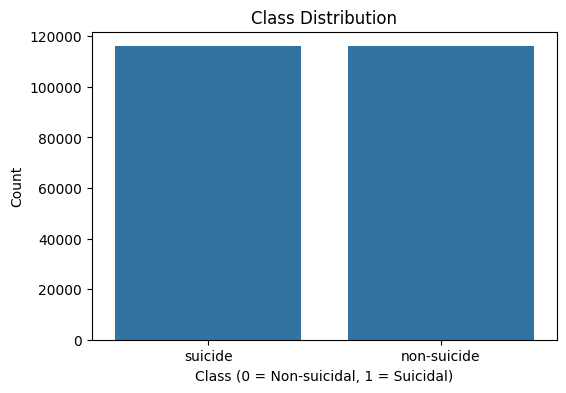

In [ ]:
import seaborn as sns

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-suicidal, 1 = Suicidal)')
plt.ylabel('Count')
plt.show()

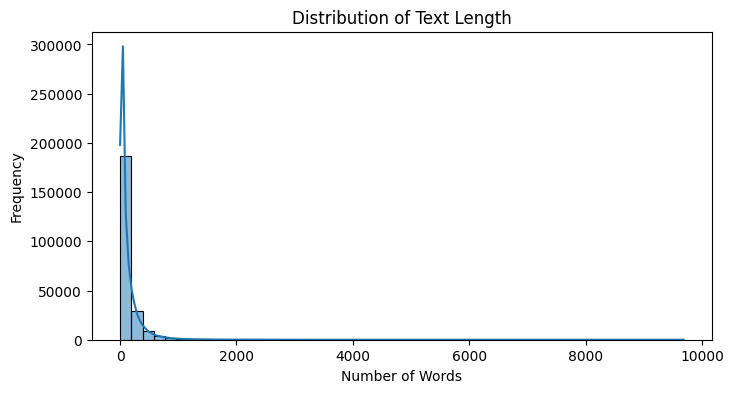

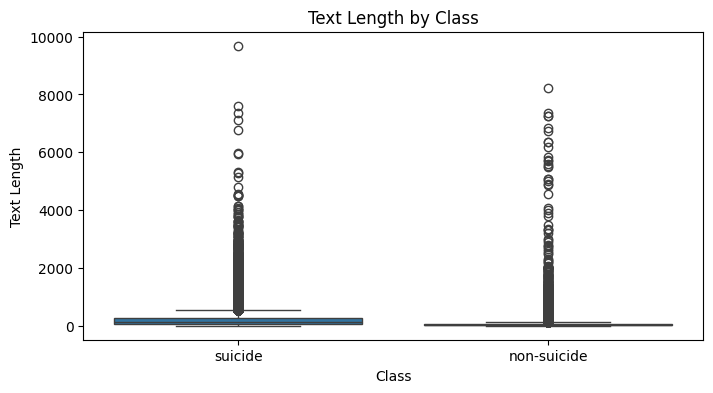

In [ ]:
# Add a column for text length
data['text_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))

# Plot distribution of text length
plt.figure(figsize=(8,4))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Compare text length by class
plt.figure(figsize=(8,4))
sns.boxplot(x='class', y='text_length', data=data)
plt.title('Text Length by Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

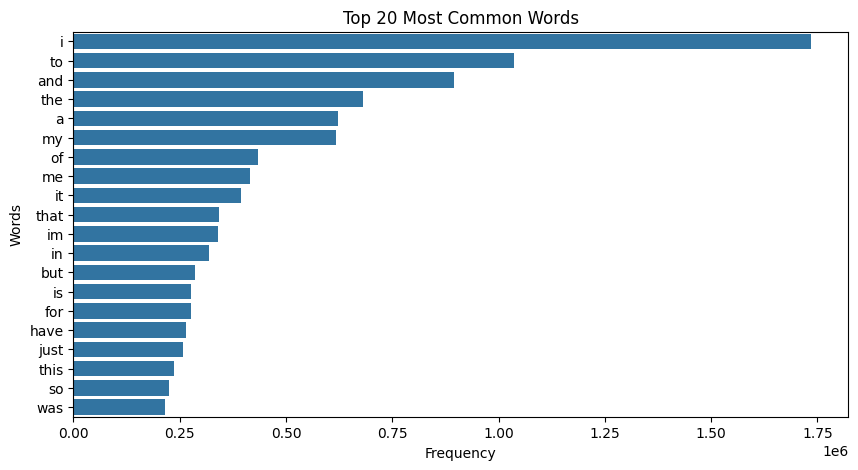

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Tokenize and flatten words
all_words = ' '.join(data['cleaned_text']).split()
most_common_words = Counter(all_words).most_common(20)

# Bar plot of most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences from tensorflow.keras
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

In [ ]:
X = data['cleaned_text']
y = data['class']  # Binary labels

# Convert text to TF-IDF features (for non-LSTM models)
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split data into training and testing
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=10)

In [ ]:
!pip install lightgbm xgboost

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)  # Also transform y_test for consistency

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Import external models
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_tfidf_train, y_train)
y_pred_lr = lr_model.predict(X_tfidf_test)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_tfidf_train, y_train)
y_pred_dt = dt_model.predict(X_tfidf_test)

# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_tfidf_train, y_train)
y_pred_rf = rf_model.predict(X_tfidf_test)

# 4. AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_tfidf_train, y_train)
y_pred_ada = ada_model.predict(X_tfidf_test)

# 5. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_tfidf_train, y_train)
y_pred_gb = gb_model.predict(X_tfidf_test)

# 6. LightGBM
lgb_model = LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_tfidf_train, y_train)
y_pred_lgb = lgb_model.predict(X_tfidf_test)

# 7. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=42)
xgb_model.fit(X_tfidf_train, y_train)
y_pred_xgb = xgb_model.predict(X_tfidf_test)

# 8. Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', lr_model), ('dt', dt_model), ('rf', rf_model),
        ('lgb', lgb_model), ('xgb', xgb_model)
    ],
    voting='hard'
)
voting_clf_hard.fit(X_tfidf_train, y_train)
y_pred_vote_hard = voting_clf_hard.predict(X_tfidf_test)

# 9. Soft Voting Classifier (only models with predict_proba)
voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', lr_model), ('rf', rf_model), ('gb', gb_model),
        ('lgb', lgb_model), ('xgb', xgb_model)
    ],
    voting='soft'
)
voting_clf_soft.fit(X_tfidf_train, y_train)
y_pred_vote_soft = voting_clf_soft.predict(X_tfidf_test)

# -------------------- Results --------------------
results = {
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest',
        'AdaBoost', 'Gradient Boosting', 'LightGBM', 'XGBoost',
        'Voting Classifier (Hard)', 'Voting Classifier (Soft)'
    ],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': []
}

# Predictions for each model
all_models = [lr_model, dt_model, rf_model, ada_model, gb_model, lgb_model, xgb_model, voting_clf_hard, voting_clf_soft]
all_preds = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_ada, y_pred_gb, y_pred_lgb, y_pred_xgb, y_pred_vote_hard, y_pred_vote_soft]

# Evaluate each model
for model, y_pred in zip(all_models, all_preds):
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))

# Display results
results_df = pd.DataFrame(results)
print("\n📊 Performance Comparison of Models (Including LightGBM and XGBoost):")
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 92831, number of negative: 92828
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 25.262955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808893
[LightGBM] [Info] Number of data points in the train set: 185659, number of used features: 4980
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000032
[LightGBM] [Info] Start training from score 0.000032


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:52:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 92831, number of negative: 92828
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 28.227018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808893
[LightGBM] [Info] Number of data points in the train set: 185659, number of used features: 4980
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000032
[LightGBM] [Info] Start training from score 0.000032


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:37:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 92831, number of negative: 92828
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 29.623259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808893
[LightGBM] [Info] Number of data points in the train set: 185659, number of used features: 4980
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000032
[LightGBM] [Info] Start training from score 0.000032


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:28:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



📊 Performance Comparison of Models (Including LightGBM and XGBoost):
                      Model  Accuracy  F1 Score  Precision    Recall
0       Logistic Regression  0.934633  0.933934   0.943965  0.924114
1             Decision Tree  0.850781  0.850080   0.854036  0.846160
2             Random Forest  0.898223  0.898326   0.897360  0.899293
3                  AdaBoost  0.863859  0.855892   0.909025  0.808627
4         Gradient Boosting  0.886825  0.882354   0.918582  0.848875
5                  LightGBM  0.918238  0.916909   0.931989  0.902310
6                   XGBoost  0.917613  0.915581   0.938666  0.893605
7  Voting Classifier (Hard)  0.922482  0.921221   0.936393  0.906533
8  Voting Classifier (Soft)  0.922848  0.921333   0.939727  0.903646



📌 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

Non-Suicidal       0.93      0.95      0.94     23209
    Suicidal       0.94      0.92      0.93     23206

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415



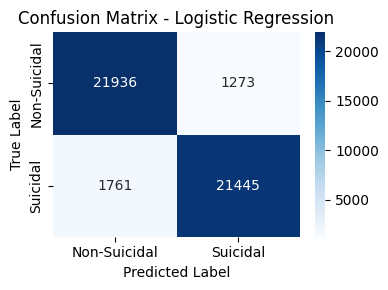


📌 Classification Report for Decision Tree:
              precision    recall  f1-score   support

Non-Suicidal       0.85      0.86      0.85     23209
    Suicidal       0.85      0.85      0.85     23206

    accuracy                           0.85     46415
   macro avg       0.85      0.85      0.85     46415
weighted avg       0.85      0.85      0.85     46415



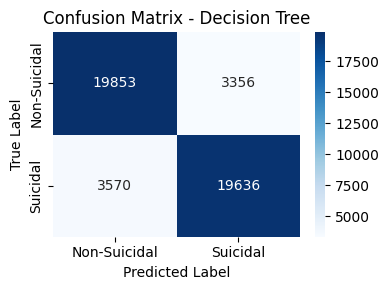


📌 Classification Report for Random Forest:
              precision    recall  f1-score   support

Non-Suicidal       0.90      0.90      0.90     23209
    Suicidal       0.90      0.90      0.90     23206

    accuracy                           0.90     46415
   macro avg       0.90      0.90      0.90     46415
weighted avg       0.90      0.90      0.90     46415



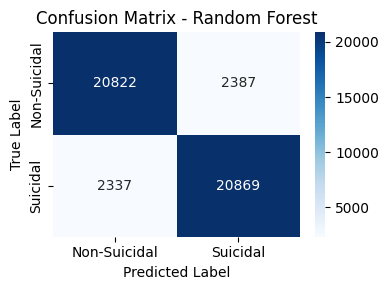


📌 Classification Report for AdaBoost:
              precision    recall  f1-score   support

Non-Suicidal       0.83      0.92      0.87     23209
    Suicidal       0.91      0.81      0.86     23206

    accuracy                           0.86     46415
   macro avg       0.87      0.86      0.86     46415
weighted avg       0.87      0.86      0.86     46415



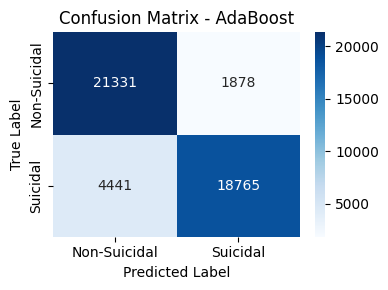


📌 Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

Non-Suicidal       0.86      0.92      0.89     23209
    Suicidal       0.92      0.85      0.88     23206

    accuracy                           0.89     46415
   macro avg       0.89      0.89      0.89     46415
weighted avg       0.89      0.89      0.89     46415



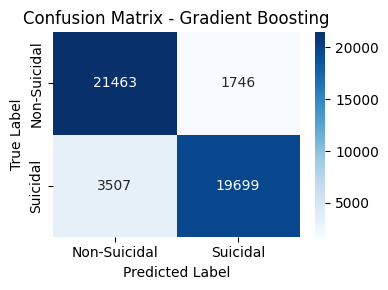


📌 Classification Report for LightGBM:
              precision    recall  f1-score   support

Non-Suicidal       0.91      0.93      0.92     23209
    Suicidal       0.93      0.90      0.92     23206

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415



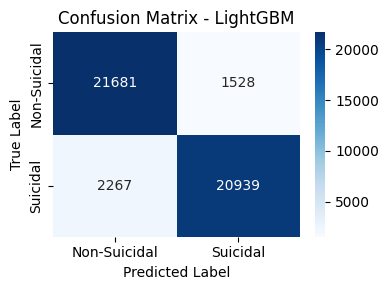


📌 Classification Report for XGBoost:
              precision    recall  f1-score   support

Non-Suicidal       0.90      0.94      0.92     23209
    Suicidal       0.94      0.89      0.92     23206

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415



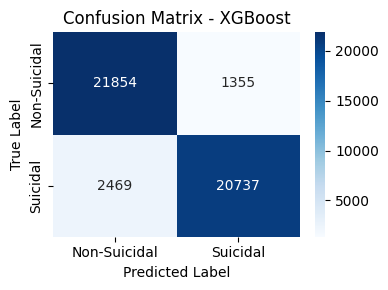


📌 Classification Report for Voting Classifier (Hard):
              precision    recall  f1-score   support

Non-Suicidal       0.91      0.94      0.92     23209
    Suicidal       0.94      0.91      0.92     23206

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415



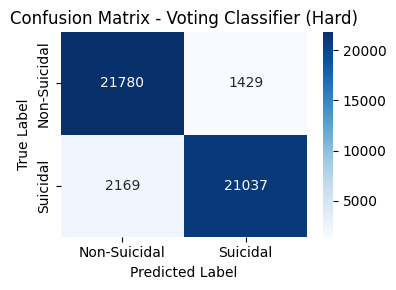


📌 Classification Report for Voting Classifier (Soft):
              precision    recall  f1-score   support

Non-Suicidal       0.91      0.94      0.92     23209
    Suicidal       0.94      0.90      0.92     23206

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415



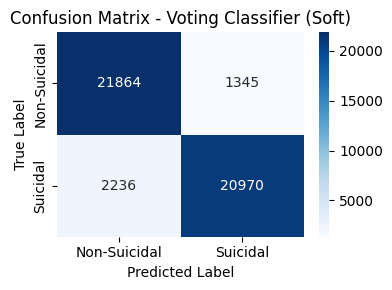

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Updated model names and corresponding predictions, including LightGBM and XGBoost
model_names = [
    'Logistic Regression', 'Decision Tree', 'Random Forest',
    'AdaBoost', 'Gradient Boosting', 'LightGBM', 'XGBoost',
    'Voting Classifier (Hard)', 'Voting Classifier (Soft)'
]

models = [lr_model, dt_model, rf_model, ada_model, gb_model, lgb_model, xgb_model, voting_clf_hard, voting_clf_soft]
predictions = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_ada, y_pred_gb, y_pred_lgb, y_pred_xgb, y_pred_vote_hard, y_pred_vote_soft]

# Loop through each model and display classification report and confusion matrix
for name, model, y_pred in zip(model_names, models, predictions):
    print(f"\n📌 Classification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=['Non-Suicidal', 'Suicidal']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Suicidal', 'Suicidal'],
                yticklabels=['Non-Suicidal', 'Suicidal'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


⚠️ Skipping Voting Classifier (Hard) - no probability or decision score method available.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-15-ead85c0aaba4>:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


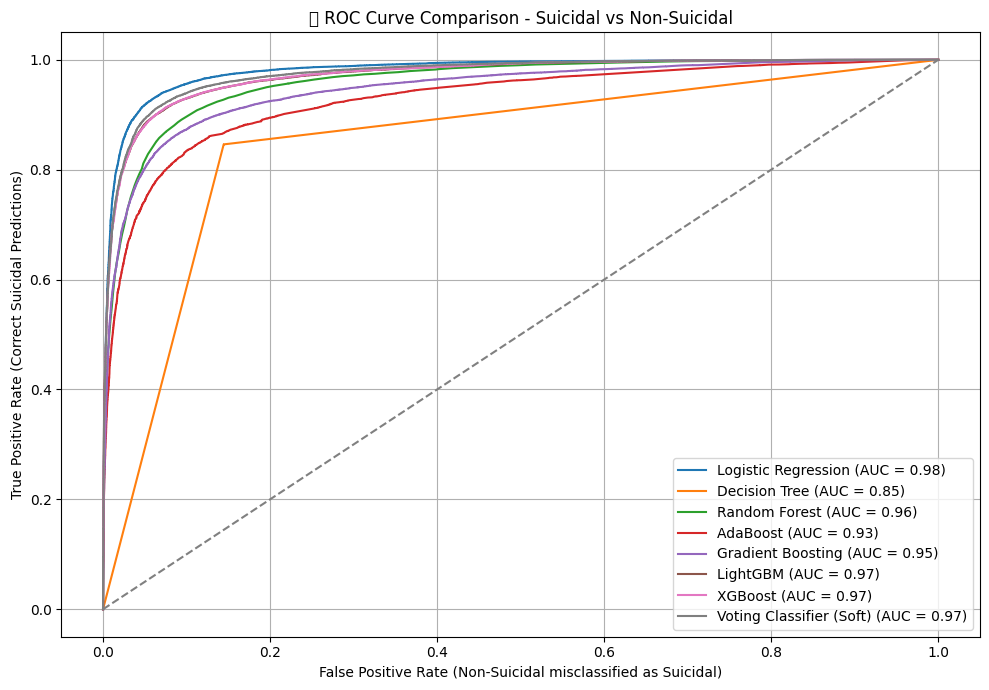

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC Curve Plot
plt.figure(figsize=(10, 7))

for name, model in zip(model_names, models):
    try:
        # Use predict_proba if available
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_tfidf_test)[:, 1]
        # Use decision_function if available (e.g., LinearSVC)
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_tfidf_test)
        else:
            print(f"⚠️ Skipping {name} - no probability or decision score method available.")
            continue

        # Compute ROC metrics
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    except Exception as e:
        print(f"❌ Error with model {name}: {e}")

# Reference line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve Comparison - Suicidal vs Non-Suicidal')
plt.xlabel('False Positive Rate (Non-Suicidal misclassified as Suicidal)')
plt.ylabel('True Positive Rate (Correct Suicidal Predictions)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()